# OBST

Genera un árbol de busqueda binaria optima basado en el pseudocodigo del libro, considerando keys como térmios técnicos.

In [ ]:
from math import inf
import time
import timeit

def optimal_bst(p, q, keys):
    start = time.perf_counter()

    n = len(p)    # real keys
    p = [None] + p[:]                   # 1index-based
    e = [[0]*(n+2) for _ in range(n+2)] # minimum expected cost
    w = [[0]*(n+2) for _ in range(n+2)] # weights
    root = [[0]*(n+2) for _ in range(n+2)] # matrix of roots

    for i in range(1, n+2):             # base cases
        e[i][i-1] = q[i-1]
        w[i][i-1] = q[i-1]

    for L in range(1, n+1):             # lengths
        for i in range(1, n-L+2):
            j = i + L - 1
            e[i][j] = inf
            w[i][j] = w[i][j-1] + p[j] + q[j]
            for r in range(i, j+1):     # try all roots
                t = e[i][r-1] + e[r+1][j] + w[i][j]
                if t < e[i][j]:
                    e[i][j] = t
                    root[i][j] = r

    elapsedOBST = time.perf_counter() - start

    return e[1][n], root, elapsedOBST

In [ ]:
keys = [
    "API", "Backend", "Frontend", "JSON", "Middleware",
    "Database", "Cache", "Session", "Auth", "Logging",
    "Queue", "Service", "Gateway", "Config", "Client",
    "Microservice", "Protocol", "Container", "Virtualization", "Cluster",
    "Deployment", "Replication", "LoadBalancer", "Failover", "Monitoring",
    "Orchestration", "Scheduler", "Autoscaling", "Ingress", "Firewall",
    "Encryption", "Compression", "Indexing", "Transaction", "Rollback",
    "Cursor", "Trigger", "Pipeline", "Workflow", "Sandbox",
    "Endpoint", "Latency", "Throughput", "Bandwidth", "DNS",
    "HTTP", "TLS", "SSL", "Proxy", "CacheInvalidation"
]


# Raw frequencies of successful searches (length = 50)
p = [
    12, 25, 18, 10, 15,
    22, 8, 7, 11, 9,
    13, 20, 17, 14, 16,
    19, 21, 6, 5, 23,
    18, 9, 8, 7, 11,
    10, 12, 14, 16, 13,
    17, 15, 19, 20, 21,
    6, 7, 8, 9, 10,
    11, 12, 13, 14, 15,
    16, 17, 18, 19, 20
]


# Uunsuccessful search frequencies (length = 51)
q = [
    0.5, 0.4, 0.3, 0.2, 0.25,
    0.35, 0.15, 0.2, 0.3, 0.25,
    0.4, 0.3, 0.2, 0.1, 0.2,
    0.3, 0.35, 0.4, 0.25, 0.15,
    0.2, 0.3, 0.25, 0.35, 0.15,
    0.2, 0.3, 0.4, 0.25, 0.1,
    0.2, 0.3, 0.25, 0.35, 0.15,
    0.2, 0.3, 0.4, 0.25, 0.1,
    0.2, 0.3, 0.25, 0.35, 0.15,
    0.2, 0.3, 0.25, 0.35, 0.15,
    0.2
]

# Expected cosr 'w'
e_obst, root_table, t = optimal_bst(p, q, keys)
print(f"OBST expected cost: {e_obst:.2f}, time: {t:.4f}s")

sorted_keys = sorted(keys)

# Print each key
for key in sorted_keys:
    print(key)


OBST expected cost: 3327.55, time: 0.0101s
API
Auth
Autoscaling
Backend
Bandwidth
Cache
CacheInvalidation
Client
Cluster
Compression
Config
Container
Cursor
DNS
Database
Deployment
Encryption
Endpoint
Failover
Firewall
Frontend
Gateway
HTTP
Indexing
Ingress
JSON
Latency
LoadBalancer
Logging
Microservice
Middleware
Monitoring
Orchestration
Pipeline
Protocol
Proxy
Queue
Replication
Rollback
SSL
Sandbox
Scheduler
Service
Session
TLS
Throughput
Transaction
Trigger
Virtualization
Workflow


In [ ]:
e_obst, raices, t = optimal_bst(p, q, keys)
n = len(keys)

print("Cálculo completado. Matriz de Raíces (root):")

def print_root_matrix():
# print in an ordered way
  for i in range(1, n + 1):
      # /print / from i..n+1
      fila_relevante = raices[i][i : n + 1]
      print(f"Fila {i}: {fila_relevante}")

  raiz_principal_indice = raices[1][n]
  costo_minimo_total = e_obst
  print(f"\nLa raíz principal del árbol es '{keys[raiz_principal_indice - 1]}' (índice {raiz_principal_indice})")

  print(f"\nCosto minimo OBST: {costo_minimo_total:.2f}")

print_root_matrix()

Cálculo completado. Matriz de Raíces (root):
Fila 1: [1, 2, 2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 15, 16, 16, 17, 17, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Fila 2: [2, 2, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 15, 16, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Fila 3: [3, 3, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
Fila 4: [4, 5, 5, 6, 6, 6, 6, 6, 6, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 15, 15, 17, 17, 17, 17, 17, 17, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 31]
Fila 5: [5, 6, 6, 6, 6, 6, 6, 9, 9, 9, 12, 12, 12, 12, 12, 13, 13, 13, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 31, 31]
Fila 6: [6, 6,

## Reconstrucción de un árbol óptimo

Al aumentar el peso de un termino, estoy aumentando la cantidad de trabajo que hara el árbol. <br>

Al subir 'e' seria el costo minimo total esperado de realizar mucha busqueda a lo largo del tiempo de acuerdo a las frecuencias con las que busca cada termino.

In [ ]:
# root --> root[1][n] --> kr debe ser la raiz

#Todos los nodos en su subárbol izquierdo deben tener claves menores a kr
#Todos los nodos en el subárbol derecho deben tener claves mayores a kr

#La buscamos en nuestra matriz
#Recursive
# left subtree --> [1, r-1]
# right subtree --> [r + 1, n]
# Se repite el proceso en el rango [1, r+1] para el izquierdo
# y [r + 1, n] para el derecho
class Nodo:
    def __init__(self, clave):
        self.clave = clave
        self.izquierda = None
        self.derecha = None

def construir_arbol_optimo(raices, keys, i, j):

    if i > j:
        return None
    indice_raiz = raices[i][j]

    if indice_raiz == 0:
        return None

    nodo = Nodo(keys[indice_raiz - 1])

    nodo.izquierda = construir_arbol_optimo(raices, keys, i, indice_raiz - 1)
    nodo.derecha = construir_arbol_optimo(raices, keys, indice_raiz + 1, j)

    return nodo

In [ ]:
# Construir el árbol óptimo
raiz_del_arbol = construir_arbol_optimo(raices, keys, 1, n)

# Verificamos
print(f"La raíz principal es: {raiz_del_arbol.clave}")
print(f"El hijo izquierdo de {raiz_del_arbol.clave} es: {raiz_del_arbol.izquierda.clave}")
print(f"El hijo derecho de {raiz_del_arbol.clave} es: {raiz_del_arbol.derecha.clave}")
print(f"El hijo izquierdo de {raiz_del_arbol.derecha.clave} es: {raiz_del_arbol.derecha.derecha.clave}")
print(f"El hijo izquierdo de {raiz_del_arbol.derecha.izquierda.clave} es: {raiz_del_arbol.derecha.izquierda.derecha.clave}")
print(f"El hijo izquierdo de {raiz_del_arbol.derecha.derecha.clave} es: {raiz_del_arbol.derecha.izquierda.derecha.clave}")
#...

La raíz principal es: Cluster
El hijo izquierdo de Cluster es: Service
El hijo derecho de Cluster es: Rollback
El hijo izquierdo de Rollback es: DNS
El hijo izquierdo de Ingress es: Indexing
El hijo izquierdo de DNS es: Indexing


## Utilizando Graphviz, ejemplo extra

In [ ]:
import graphviz

# --- optimal_bst function  ---
# e_obst, raices, t = optimal_bst(p, q, keys)
# n = len(keys)
# keys = ["key1", "key2", ...]

def draw_obst(keys, raices, n):
    """
    Generates a Graphviz visualization of the Optimal Binary Search Tree.
    """
    dot = graphviz.Digraph('OBST', comment='Optimal Binary Search Tree')
    dot.attr('node', shape='circle')

    def add_nodes_and_edges(i, j):
        # Base case:no subtree
        if i > j:
            return

        root_idx = raices[i][j]

        # Invalid --> dummy node.
        if root_idx == 0:
            return

        # Get the label for the node from the keys list (0-indexed)
        root_label = keys[root_idx - 1]

        # --- Recursively process left subtree ---
        # range [i..root_idx-1]
        left_child_idx = raices[i][root_idx - 1] if i <= root_idx - 1 else 0
        if left_child_idx != 0:
            left_child_label = keys[left_child_idx - 1]
            dot.edge(root_label, left_child_label)
            add_nodes_and_edges(i, root_idx - 1)

        # --- Recursively process right subtree ---
        # range  [root_idx+1..j]
        right_child_idx = raices[root_idx + 1][j] if root_idx + 1 <= j else 0
        if right_child_idx != 0:
            right_child_label = keys[right_child_idx - 1]
            dot.edge(root_label, right_child_label)
            add_nodes_and_edges(root_idx + 1, j)

    # Building the entire tree from keys 1 to n
    add_nodes_and_edges(1, n)

    # Render the graph
    print("\nGenerating graph...")
    dot.render('obst_graph', view=True, format='png')
    print("Graph 'obst_graph.png' has been created.")

# --- Call the function after your OBST calculation ---
draw_obst(keys, raices, n)


Generating graph...
Graph 'obst_graph.png' has been created.


## OBST vs BST

Se evaluará su tiempo mínimo de costo y su tiempo de ejecución de cada algoritmo.

## BST

In [ ]:
import time

class Node:
    def __init__(self, key, prob):
        self.key = key
        self.prob = prob
        self.left = None
        self.right = None

def insert(root, key, prob):
    if root is None:
        return Node(key, prob)
    if key < root.key:
        root.left = insert(root.left, key, prob)
    else:
        root.right = insert(root.right, key, prob)
    return root

def bst(p, keys):
    """
    p: probabilities of keys (same length as keys)
    keys: list of sorted keys (A, B, C, ...)
    """
    start = time.perf_counter()

    root = None
    for k, prob in zip(keys, p):
        root = insert(root, k, prob)

    # Traverse and compute expected cost
    e = []
    def dfs(node, depth):
        if node:
            e.append(node.prob * depth)
            dfs(node.left, depth+1)
            dfs(node.right, depth+1)
    dfs(root, 1)

    end = time.perf_counter()
    elapsed = end - start

    return sum(e), root, elapsed

In [ ]:
# 50 CHARACTERS

keys = [
    "API", "Backend", "Frontend", "JSON", "Middleware",
    "Database", "Cache", "Session", "Auth", "Logging",
    "Queue", "Service", "Gateway", "Config", "Client",
    "Microservice", "Protocol", "Container", "Virtualization", "Cluster",
    "Deployment", "Replication", "LoadBalancer", "Failover", "Monitoring",
    "Orchestration", "Scheduler", "Autoscaling", "Ingress", "Firewall",
    "Encryption", "Compression", "Indexing", "Transaction", "Rollback",
    "Cursor", "Trigger", "Pipeline", "Workflow", "Sandbox",
    "Endpoint", "Latency", "Throughput", "Bandwidth", "DNS",
    "HTTP", "TLS", "SSL", "Proxy", "CacheInvalidation"
]

# Frequencies of successful search (length = 15)
p = [
    12, 25, 18, 10, 15,
    22, 8, 7, 11, 9,
    13, 20, 17, 14, 16,
    19, 21, 6, 5, 23,
    18, 9, 8, 7, 11,
    10, 12, 14, 16, 13,
    17, 15, 19, 20, 21,
    6, 7, 8, 9, 10,
    11, 12, 13, 14, 15,
    16, 17, 18, 19, 20
]

e_bst, root, t = bst(p, keys)
def cost_BST():
  print(f"Expected cost BST: {e_bst:.2f}, time: {t:.4f}s")

cost_BST();

Expected cost BST: 4965.00, time: 0.0002s


## Comparando su costo de búsqueda "e" y su tiempo de ejecución

In [ ]:
# one run (exact time for this run)
e_obst, root_table, t_obst = optimal_bst(p, q, keys)
print(f"OBST expected cost: {e_obst:.2f}, time: {t_obst:.6f}s")

# Build regular BST (insertion order )
e_regular, root_regular, t_regular = bst(p, keys)
print(f"Regular BST expected cost: {e_regular:.2f}, time: {t_regular:.6f}s")

# Benchmark
avg_optimal = timeit.timeit(lambda: optimal_bst(p, q, keys)[0], number=100) / 100
avg_regular = timeit.timeit(lambda: bst(p, keys)[0], number=100) / 100
print(f"Optimal BST avg time: {avg_optimal:.6f}s")
print(f"Regular BST avg time: {avg_regular:.6f}s")

OBST expected cost: 3327.55, time: 0.020407s
Regular BST expected cost: 4965.00, time: 0.010441s
Optimal BST avg time: 0.009323s
Regular BST avg time: 0.000109s


# Gráficos de Comparación

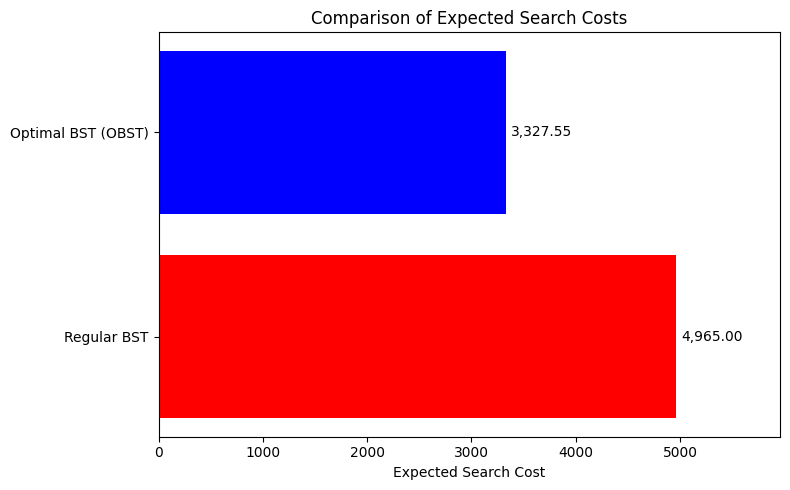

Running performance benchmark for the line graph... 
Benchmark complete.


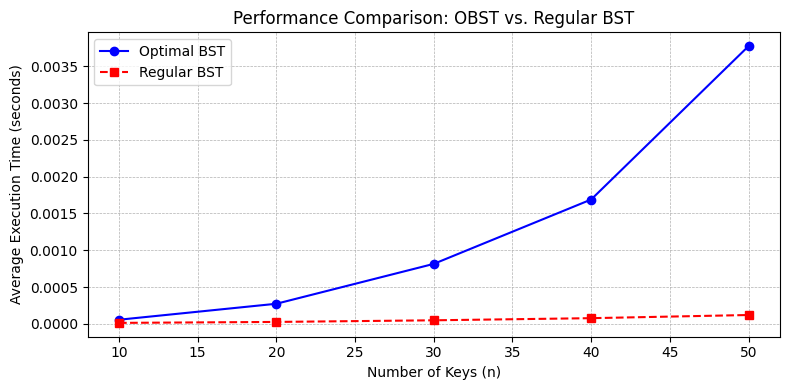

In [ ]:
import matplotlib.pyplot as plt
import timeit
import random
from math import inf
import time

# --- Data for the first graph (bar chart) ---
e_obst = 3327.55
e_regular = 4965.00

# --- Graph 1: Cost Comparison (Horizontal Bar Chart) ---
plt.figure(figsize=(8, 5))
labels_cost = ['Optimal BST (OBST)', 'Regular BST']
costs = [e_obst, e_regular]
bars_cost = plt.barh(labels_cost, costs, color=['blue', 'red'])

plt.xlabel('Expected Search Cost')
plt.title('Comparison of Expected Search Costs')
plt.xlim(0, max(costs) * 1.2)

# Use a relative offset based on the plot's scale
offset = max(costs) * 0.01
for bar in bars_cost:
    width = bar.get_width()
    #  comma as a separator
    plt.text(width + offset, bar.get_y() + bar.get_height()/2.0, f'{width:,.2f}', va='center', ha='left')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

n_values = range(10, 51, 10) # Test for n = 10, 20, ..., 60 keys
obst_times = []
bst_times = []
print("Running performance benchmark for the line graph... ")

for n in n_values:
    # Generate random probabilities for this n
    keys = list(range(n))
    p_rand = [random.random() for _ in range(n)]
    q_rand = [random.random() for _ in range(n + 1)]
    total = sum(p_rand) + sum(q_rand)
    p = [val / total for val in p_rand]
    q = [val / total for val in q_rand]

    # Time OBST
    t_obst = timeit.timeit(lambda: optimal_bst(p, q, keys), number=5) / 5
    obst_times.append(t_obst)

    # Time regular BST
    t_bst = timeit.timeit(lambda: bst(p, keys), number=5) / 5
    bst_times.append(t_bst)
print("Benchmark complete.")


# --- Graph 2: Time Complexity Comparison (Line Chart) ---
plt.figure(figsize=(8, 4))

plt.plot(n_values, obst_times, marker='o', linestyle='-', color='blue', label='Optimal BST')
plt.plot(n_values, bst_times, marker='s', linestyle='--', color='red', label='Regular BST')

plt.xlabel('Number of Keys (n)')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Performance Comparison: OBST vs. Regular BST')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()